<a href="https://colab.research.google.com/github/Scottymichaelmillerguy/Exploring_Time_Series_Forecasting_Algorithms/blob/main/exploring_time_series_forecasting_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Time Series Forecasting Algorithms

## From ML Algorithms to GenAI & LLMs by Aman Kharwal

## Getting Started with ARIMA (AutoRegressive INtegrated Moving Average) for Time Series Forecasting

Below is a simplified example of implementing ARIMA using statsmodels on my Instagram reach data

In [1]:
# Importing Necessary Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [2]:
# read the data
data = pd.read_csv('Instagram-Reach.csv')
print(data.head())

                  Date  Instagram reach
0  2022-04-01T00:00:00             7620
1  2022-04-02T00:00:00            12859
2  2022-04-03T00:00:00            16008
3  2022-04-04T00:00:00            24349
4  2022-04-05T00:00:00            20532


Now, we will extract only date values from the date column:

In [3]:
# extractive only date values from the date column

data["Date"] = pd.to_datetime(data["Date"])

# Extract only the date part from the "Date" column
data["Date"] = data["Date"].dt.date

Now let's visualize the trend of the data

In [6]:
# visualizing the trend of the data

fig = go.Figure()
fig.add_trace(go.Scatter(x=data['Date'],
                         y=data['Instagram reach'],
                         mode='lines', name='Instagram reach'))

fig.update_layout(title='Instagram Reach Trend', xaxis_title='Date',
                  yaxis_title='Instagram Reach')

fig.show()

We can see that the data is not stationary and its not appropriate to use the ARIMA model. We use SARIMA model which we will explore later. For now let's continue with the implementation of ARIMA on this dataset only:

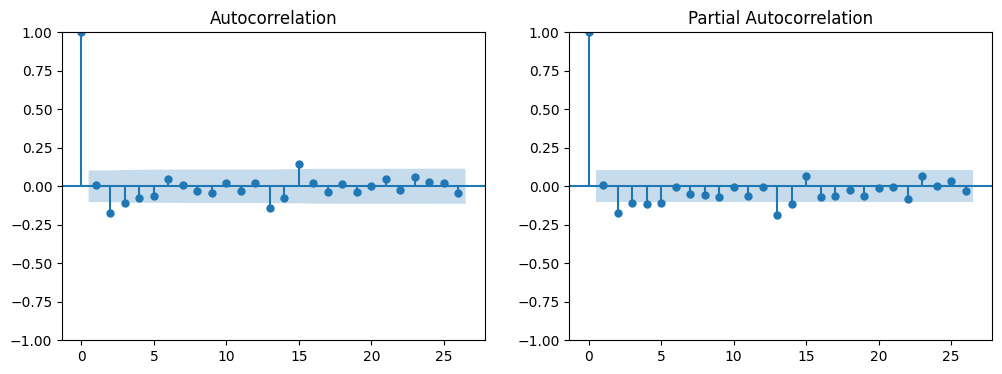

In [7]:
# resetting index
time_series = data.set_index('Date')['Instagram reach']

# Differencing
differenced_series = time_series.diff().dropna()

# Plot ACF and PACF of differenced time series
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(differenced_series, ax=axes[0])
plot_pacf(differenced_series, ax=axes[1])
plt.show()

Now here is how to implement the ARIMA model to forecast time series:

In [8]:
p, d, q = 1, 1, 1 # d = 1 because the data is non-stationary
model = ARIMA(time_series, order=(p, d, q))
results = model.fit()

print(results.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



                               SARIMAX Results                                
Dep. Variable:        Instagram reach   No. Observations:                  365
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4026.336
Date:                Mon, 03 Feb 2025   AIC                           8058.672
Time:                        21:41:35   BIC                           8070.364
Sample:                    04-01-2022   HQIC                          8063.319
                         - 03-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7791      0.046     17.084      0.000       0.690       0.869
ma.L1         -0.9607      0.022    -44.607      0.000      -1.003      -0.918
sigma2      2.559e+08   2.81e-11   9.11e+18      0.0

Now, here is how we can see the predicted values for the next 100 days

In [9]:
# Predict future values
future_steps = 100
predictions = results.predict(len(time_series), len(time_series) + future_steps - 1)

## SARIMA for Time Series Forecasting (Seasonal AutoRegressive Integrated Moving Average)

Here is how to change your ARIMA model into a SARIMA model

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
p, d, q, s = 1, 1, 1, 12

model = SARIMAX(time_series, order=(p, d, q), seasonal_order=(p, d, q, s))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



                                     SARIMAX Results                                      
Dep. Variable:                    Instagram reach   No. Observations:                  365
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3944.546
Date:                            Mon, 03 Feb 2025   AIC                           7899.092
Time:                                    21:49:38   BIC                           7918.410
Sample:                                04-01-2022   HQIC                          7906.779
                                     - 03-31-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7847      0.086      9.116      0.000       0.616       0.953
ma.L1         -0.9596      0.045   